# PROJECT SPECIFICATIONS

Create a song recommender based on the features of the songs in Spotify.

Deppending on that, the model will recommend you back a similar song to you

Enjoy it!

# TOP100 PLAYLIST

## From a URL create a Dataframe

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
from tqdm.notebook import tqdm
import random

In [2]:
url = "https://www.billboard.com/charts/hot-100/"

In [3]:
top100 = requests.get(url)

In [4]:
top100.status_code

200

## Search for the songs in the URL

In [5]:
soup=BeautifulSoup(top100.content,'html.parser')

In [6]:
soup.select('h3.c-title.a-no-trucate')[0].text

'\nEasy On Me\n'

In [7]:
top100=len(soup.select('h3.c-title.a-no-trucate'))

In [8]:
top100

100

In [9]:
index = soup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

In [10]:
index

'Easy On Me'

## Search for the artists in the URL

In [11]:
soup.select('span.c-label.a-no-trucate')[0].get_text(strip=True)

'Adele'

In [12]:
soup.select('span.c-label.a-no-trucate')[99].get_text(strip=True)

'The Weeknd'

## Create a DataFrame

In [13]:
title = []
artist = []

In [14]:
for i in tqdm(range(top100)):
    title.append(soup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(soup.select('span.c-label.a-no-trucate')[i].get_text(strip=True))

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
songs_top100=pd.DataFrame({'Title':title,'Artist':artist})

In [16]:
songs_top100

,Title,Artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele
...,...,...
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux


In [17]:
songs_top100[92:]

,Title,Artist
92,Volvi,Aventura x Bad Bunny
93,Maybach,42 Dugg Featuring Future
94,Baddest,"Yung Bleu, Chris Brown & 2 Chainz"
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux
99,Take My Breath,The Weeknd


## Create a prototype where:
- The user can ask for one song and see if its in the playlist Top hot 100 songs
- Returns a new song if the first one is in the playlist

In [18]:
song= input("Give us a song name to get a recommendation!: ")

Give us a song name to get a recommendation!: stay


In [19]:
check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]

In [20]:
index = check.index.tolist()

In [21]:
def recommendation_engine():
    recommendation_engine()

In [22]:
song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()

if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! ")
else:
    answer = input("Do you mean " + songs_top100.Title[index].values[0] + " by " + songs_top100.Artist[index].values[0] + "?")

    if answer.lower() == 'yes':
        suggestion = songs_top100.sample().index.tolist()
        print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + " by " + songs_top100['Artist'][suggestion].item())

    else:
        print("that song is not in the playlist, try another song!")
    
    

Give us a song name to get a recommendation!: stay
Do you mean Stay by The Kid LAROI & Justin Bieber?yes
Nice! This is a hot song! You might also like Rockin' Around The Christmas Tree by Brenda Lee


# IMPORT SPOTIFY PLAYLISTS

In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Credentials

In [24]:
import getpass

client_id=str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [25]:
# embedding our getpass credentials in the access key

sp= spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

## Import playlists by genre POP
- I will first import a POP playlist

In [26]:
## https://open.spotify.com/playlist/37i9dQZF1DX1ngEVM0lKrb?si=332a03edd1db4135
## 37i9dQZF1DX1ngEVM0lKrb

In [27]:
pop_playlist = sp.user_playlist_tracks("Sarah Eringaard", "1HWoagBCUTlqigP88enL5r")

In [28]:
pop_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [29]:
len(pop_playlist['items'])

100

In [30]:
def get_playlist_tracks(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [31]:
results2=get_playlist_tracks("Sarah Eringaard", "1HWoagBCUTlqigP88enL5r")

In [32]:
len(results2)

473

In [33]:
results2[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [34]:
results2[0]['track']["uri"].rsplit(':',1)

['spotify:track', '04aAxqtGp5pv12UXAg4pkq']

In [35]:
results2[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [36]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results2

In [37]:
for r in results2:
    song_URI.append(r["track"]["uri"])

In [38]:
for r in results2: 
    song_ID.append(r["track"]["id"])

In [39]:
for r in results2: 
    song_name.append(r["track"]["name"])

In [40]:
for r in results2: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [41]:
import pandas as pd

In [42]:
playlist_pop_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})


In [43]:
playlist_pop_info

,song_name,song_ID,song_artist
0,Centuries,04aAxqtGp5pv12UXAg4pkq,Fall Out Boy
1,Counting Stars,6sy3LkhNFjJWlaeSMNwQ62,OneRepublic
2,Animals,16pwlVsypm4aDKMhXdOuXg,Maroon 5
3,Take Me to Church,0aOluBqXYd0rFSCsgDyAWX,Hozier
4,Rude,6RtPijgfPKROxEzTHNRiDp,MAGIC!
...,...,...,...
468,Jenny,2rpVmxAGGc18wpBREaoE0R,Studio Killers
469,I'm Gonna Be (500 Miles),66S14BkJDxgkYxLl5DCqOz,The Proclaimers
470,My Humps,19JdbdEwQI7bCxefMokZO8,Black Eyed Peas
471,I Just Wanna Run,3WLLJzllBEgPiSA0qd3BN3,The Downtown Fiction


### Add a new column for genre in playlist_pop_info

In [44]:
playlist_pop_info.insert(3, 'Genre', 'Pop') 

In [45]:
playlist_pop_info

,song_name,song_ID,song_artist,Genre
0,Centuries,04aAxqtGp5pv12UXAg4pkq,Fall Out Boy,Pop
1,Counting Stars,6sy3LkhNFjJWlaeSMNwQ62,OneRepublic,Pop
2,Animals,16pwlVsypm4aDKMhXdOuXg,Maroon 5,Pop
3,Take Me to Church,0aOluBqXYd0rFSCsgDyAWX,Hozier,Pop
4,Rude,6RtPijgfPKROxEzTHNRiDp,MAGIC!,Pop
...,...,...,...,...
468,Jenny,2rpVmxAGGc18wpBREaoE0R,Studio Killers,Pop
469,I'm Gonna Be (500 Miles),66S14BkJDxgkYxLl5DCqOz,The Proclaimers,Pop
470,My Humps,19JdbdEwQI7bCxefMokZO8,Black Eyed Peas,Pop
471,I Just Wanna Run,3WLLJzllBEgPiSA0qd3BN3,The Downtown Fiction,Pop


## Import playlists by genre INDIE
- I will import now a INDIE playlist

In [46]:
## https://open.spotify.com/playlist/7lnCgcTxLTTcOqvgoS80sC?si=923d97089cf041ea
## oceanify

In [47]:
indie_playlist = sp.user_playlist_tracks("oceanify", "7lnCgcTxLTTcOqvgoS80sC")

In [48]:
indie_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [49]:
len(indie_playlist['items'])

100

In [50]:
def get_playlist_tracks1(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [51]:
results3=get_playlist_tracks1("oceanify", "7lnCgcTxLTTcOqvgoS80sC")

In [52]:
len(results3)

170

In [53]:
results3[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [54]:
results3[0]['track']["uri"].rsplit(':',1)

['spotify:track', '3Wrjm47oTz2sjIgck11l5e']

In [55]:
results3[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [56]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results3

In [57]:
for r in results3:
    song_URI.append(r["track"]["uri"])
    
for r in results3: 
    song_ID.append(r["track"]["id"])
    
for r in results3: 
    song_name.append(r["track"]["name"])
    
for r in results3: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [58]:
playlist_indie_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})


In [59]:
playlist_indie_info

,song_name,song_ID,song_artist
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby
...,...,...,...
165,Maybe - Extended Version,5M9FFdvLfKPkORIRERHzKY,Elizabeth Cuite
166,Deja Vu,5PWT6FhFPn2E5dv5tUuqNE,Luvlee
167,One in a Million,0B2gr2o765XiWU6dGKmktU,Will Whisson
168,Comin’ Home (Stewart Sullivan Mix),49FulGQwWUrWVVB69TfHAr,Dominoe


### Add a new column for genre in playlist_indie_info

In [60]:
playlist_indie_info.insert(3, 'Genre', 'Indie') 

In [61]:
playlist_indie_info

,song_name,song_ID,song_artist,Genre
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...
165,Maybe - Extended Version,5M9FFdvLfKPkORIRERHzKY,Elizabeth Cuite,Indie
166,Deja Vu,5PWT6FhFPn2E5dv5tUuqNE,Luvlee,Indie
167,One in a Million,0B2gr2o765XiWU6dGKmktU,Will Whisson,Indie
168,Comin’ Home (Stewart Sullivan Mix),49FulGQwWUrWVVB69TfHAr,Dominoe,Indie


## Import playlists by genre ROCK
- I will import now a ROCK playlist

In [62]:
## https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U?si=6870797da01948f7
## Spotify

In [63]:
rock_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DWXRqgorJj26U")

In [64]:
rock_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [65]:
len(rock_playlist['items'])

100

In [66]:
def get_playlist_tracks2(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [67]:
results4=get_playlist_tracks2("Spotify", "37i9dQZF1DWXRqgorJj26U")

In [68]:
len(results4)

166

In [69]:
results4[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [70]:
results4[0]['track']["uri"].rsplit(':',1)

['spotify:track', '57JVGBtBLCfHw2muk5416J']

In [71]:
results4[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [72]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results4

In [73]:
for r in results4:
    song_URI.append(r["track"]["uri"])
    
for r in results4: 
    song_ID.append(r["track"]["id"])
    
for r in results4: 
    song_name.append(r["track"]["name"])
    
for r in results4: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [74]:
playlist_rock_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [75]:
playlist_rock_info

,song_name,song_ID,song_artist
0,Another One Bites The Dust - Remastered 2011,57JVGBtBLCfHw2muk5416J,Queen
1,Paradise City,3YBZIN3rekqsKxbJc9FZko,Guns N' Roses
2,Black Dog - Remaster,3qT4bUD1MaWpGrTwcvguhb,Led Zeppelin
3,Highway to Hell,2zYzyRzz6pRmhPzyfMEC8s,AC/DC
4,Dream On,5MxNLUsfh7uzROypsoO5qe,Aerosmith
...,...,...,...
161,Ramble On - 1990 Remaster,3MODES4TNtygekLl146Dxd,Led Zeppelin
162,Crazy On You,5zH710lFSLtkHbMkslLDjR,Heart
163,Foreplay / Long Time,5UYPZZDQfpCE7A0FDDqv4k,Boston
164,My Generation - Mono Version,45s88Xopo6KvHc0PQ05aGg,The Who


### Add a new column for genre in playlist_rock_info

In [76]:
playlist_rock_info.insert(3, 'Genre', 'Rock') 

In [77]:
playlist_rock_info

,song_name,song_ID,song_artist,Genre
0,Another One Bites The Dust - Remastered 2011,57JVGBtBLCfHw2muk5416J,Queen,Rock
1,Paradise City,3YBZIN3rekqsKxbJc9FZko,Guns N' Roses,Rock
2,Black Dog - Remaster,3qT4bUD1MaWpGrTwcvguhb,Led Zeppelin,Rock
3,Highway to Hell,2zYzyRzz6pRmhPzyfMEC8s,AC/DC,Rock
4,Dream On,5MxNLUsfh7uzROypsoO5qe,Aerosmith,Rock
...,...,...,...,...
161,Ramble On - 1990 Remaster,3MODES4TNtygekLl146Dxd,Led Zeppelin,Rock
162,Crazy On You,5zH710lFSLtkHbMkslLDjR,Heart,Rock
163,Foreplay / Long Time,5UYPZZDQfpCE7A0FDDqv4k,Boston,Rock
164,My Generation - Mono Version,45s88Xopo6KvHc0PQ05aGg,The Who,Rock


## Import playlists by genre TROPICAL HOUSE
- I will import now a TROPICAL HOUSE playlist

In [78]:
## https://open.spotify.com/playlist/37i9dQZF1DX0AMssoUKCz7?si=8509345b0f7b4117
## Spotify

In [79]:
tropical_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX0AMssoUKCz7")

In [80]:
tropical_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [81]:
len(tropical_playlist['items'])

100

In [82]:
def get_playlist_tracks3(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [83]:
results5=get_playlist_tracks3("Spotify", "37i9dQZF1DX0AMssoUKCz7")

In [84]:
len(results5)

200

In [85]:
results5[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [86]:
results5[0]['track']["uri"].rsplit(':',1)

['spotify:track', '4C020pCjavabKAGmjZZRmh']

In [87]:
results5[0]['track']["artists"][0].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [88]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results5

In [89]:
for r in results5:
    song_URI.append(r["track"]["uri"])
    
for r in results5: 
    song_ID.append(r["track"]["id"])
    
for r in results5: 
    song_name.append(r["track"]["name"])
    
for r in results5: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [90]:
playlist_tropical_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [91]:
playlist_tropical_info

,song_name,song_ID,song_artist
0,Ride,4C020pCjavabKAGmjZZRmh,Madism
1,Tear Me Down (feat. Philip Rustad),71UYuIZf0TeXAjyy72COVr,Davai
2,Summer Feeling,793OuR8rJ0zpVp708ONAxO,Matoma
3,The Best Days (feat. Tabitha),140XpWSdJ0jZEbLj9iVnPA,Sam Feldt
4,Call On Me (feat. Georgia Ku),3pBv3LfvfPft2TqHleqKHo,Sam Feldt
...,...,...,...
195,Cold Ain't For Me,43NJeiVFjYj6RtvAKWLnDo,Oceans
196,Somebody Else,6UW9S0skvWZ9PUvLti7aZP,Zonoma
197,Bring Me Down (ft. Bright Sparks),1VPRoO8oPV8dIW47js8EA0,TV Noise
198,If You're Hearing This,1aJ1xeEQ1ivKGnTeuYolJk,Hook N Sling


### Add a new column for genre in playlist_tropical_info

In [92]:
playlist_tropical_info.insert(3, 'Genre', 'Tropical') 

In [93]:
playlist_tropical_info

,song_name,song_ID,song_artist,Genre
0,Ride,4C020pCjavabKAGmjZZRmh,Madism,Tropical
1,Tear Me Down (feat. Philip Rustad),71UYuIZf0TeXAjyy72COVr,Davai,Tropical
2,Summer Feeling,793OuR8rJ0zpVp708ONAxO,Matoma,Tropical
3,The Best Days (feat. Tabitha),140XpWSdJ0jZEbLj9iVnPA,Sam Feldt,Tropical
4,Call On Me (feat. Georgia Ku),3pBv3LfvfPft2TqHleqKHo,Sam Feldt,Tropical
...,...,...,...,...
195,Cold Ain't For Me,43NJeiVFjYj6RtvAKWLnDo,Oceans,Tropical
196,Somebody Else,6UW9S0skvWZ9PUvLti7aZP,Zonoma,Tropical
197,Bring Me Down (ft. Bright Sparks),1VPRoO8oPV8dIW47js8EA0,TV Noise,Tropical
198,If You're Hearing This,1aJ1xeEQ1ivKGnTeuYolJk,Hook N Sling,Tropical


## Import playlists by genre HIPHOP
- I will import now a HIPHOP playlist

In [94]:
## https://open.spotify.com/playlist/33I6RpefRQcRh69xEczaKT?si=8bc85c31fb894e45
## Leon Bouw

In [95]:
hiphop_playlist = sp.user_playlist_tracks("Leon Bouw", "33I6RpefRQcRh69xEczaKT")

In [96]:
hiphop_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [97]:
len(hiphop_playlist['items'])

100

In [98]:
def get_playlist_tracks4(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [99]:
results6=get_playlist_tracks3("Leon Bouw", "33I6RpefRQcRh69xEczaKT")

In [100]:
len(results6)

265

In [101]:
results6[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [102]:
results6[0]['track']["uri"].rsplit(':',1)

['spotify:track', '1YrHyDbH17btvI2rFTkbCQ']

In [103]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results6

In [104]:
for r in results6:
    song_URI.append(r["track"]["uri"])
    
for r in results6: 
    song_ID.append(r["track"]["id"])
    
for r in results6: 
    song_name.append(r["track"]["name"])
    
for r in results6: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [105]:
playlist_hiphop_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [106]:
playlist_hiphop_info

,song_name,song_ID,song_artist
0,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,Snoop Dogg
1,How We Do,6mZcNu9i8uhOYMiEAyEx81,The Game
2,No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,Waka Flocka Flame
3,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,Kanye West
4,99 Problems,4HsL5A46wa0O2jQ0ngj3H7,JAY-Z
...,...,...,...
260,Yo Sassy Ways,0J1siBLQBHYgYKeFgu7RAY,Warren G
261,Cisco Kid,0CJ3Y3V6UQn5X7IjXDO3IO,Redman
262,Woah! - Radio Mix,5fZjSIReYPJIPwpvrsyW3o,Black Rob
263,I Don't Wanna Care Right Now (feat. MDMA),5yhXLtQL9waNMjgkl8MsMP,Lupe Fiasco


### Add a new column for genre in playlist_hiphop_info

In [107]:
playlist_hiphop_info.insert(3, 'Genre', 'HipHop') 

In [108]:
playlist_hiphop_info

,song_name,song_ID,song_artist,Genre
0,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,Snoop Dogg,HipHop
1,How We Do,6mZcNu9i8uhOYMiEAyEx81,The Game,HipHop
2,No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,Waka Flocka Flame,HipHop
3,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,Kanye West,HipHop
4,99 Problems,4HsL5A46wa0O2jQ0ngj3H7,JAY-Z,HipHop
...,...,...,...,...
260,Yo Sassy Ways,0J1siBLQBHYgYKeFgu7RAY,Warren G,HipHop
261,Cisco Kid,0CJ3Y3V6UQn5X7IjXDO3IO,Redman,HipHop
262,Woah! - Radio Mix,5fZjSIReYPJIPwpvrsyW3o,Black Rob,HipHop
263,I Don't Wanna Care Right Now (feat. MDMA),5yhXLtQL9waNMjgkl8MsMP,Lupe Fiasco,HipHop


## Import playlists by genre LATIN
- I will import now a LATIN playlist

In [109]:
## https://open.spotify.com/playlist/4DLmZ0UM8TH0UXRfI0Mvu6?si=138328e1e1b44091
## MiKeL

In [110]:
latin_playlist = sp.user_playlist_tracks("MiKeL", "4DLmZ0UM8TH0UXRfI0Mvu6")

In [111]:
latin_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [112]:
len(latin_playlist['items'])

100

In [113]:
def get_playlist_tracks5(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [114]:
results7=get_playlist_tracks5("MiKeL", "4DLmZ0UM8TH0UXRfI0Mvu6")

In [115]:
len(results7)

271

In [116]:
results7[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [117]:
results7[0]['track']["uri"].rsplit(':',1)

['spotify:track', '1ZcrHpBbILPNfhBtPhQVHh']

In [118]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results7

In [119]:
for r in results7:
    song_URI.append(r["track"]["uri"])
    
for r in results7: 
    song_ID.append(r["track"]["id"])
    
for r in results7: 
    song_name.append(r["track"]["name"])
    
for r in results7: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [120]:
playlist_latin_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [121]:
playlist_latin_info

,song_name,song_ID,song_artist
0,Se Menea,1ZcrHpBbILPNfhBtPhQVHh,Don Omar
1,Una Vaina Loca,2qEoAz0i6yEz5dPggABcLH,Fuego
2,Señor Juez,2PH533J1xudlfZ5GaHAdVX,Ozuna
3,Ella - Remix,7iHHlCbsFou5DZSW5HCPfs,Boza
4,Unfollow,6GsD646HrIDJJpzoY9T1Rt,Duki
...,...,...,...
266,Ay Vamos,6Ges5C2IE738iJh4HyQizQ,J Balvin
267,Love Not War (The Tampa Beat),4Lt6GXGzYsa1tgkv3nGSTm,Jason Derulo
268,BICHOTA,7vrJn5hDSXRmdXoR30KgF1,KAROL G
269,Hey DJ,1XgpK29CGGjZnxPYkiRbh4,CNCO


### Add a new column for genre in playlist_latin_info

In [122]:
playlist_latin_info.insert(3, 'Genre', 'Latin') 

In [123]:
playlist_latin_info

,song_name,song_ID,song_artist,Genre
0,Se Menea,1ZcrHpBbILPNfhBtPhQVHh,Don Omar,Latin
1,Una Vaina Loca,2qEoAz0i6yEz5dPggABcLH,Fuego,Latin
2,Señor Juez,2PH533J1xudlfZ5GaHAdVX,Ozuna,Latin
3,Ella - Remix,7iHHlCbsFou5DZSW5HCPfs,Boza,Latin
4,Unfollow,6GsD646HrIDJJpzoY9T1Rt,Duki,Latin
...,...,...,...,...
266,Ay Vamos,6Ges5C2IE738iJh4HyQizQ,J Balvin,Latin
267,Love Not War (The Tampa Beat),4Lt6GXGzYsa1tgkv3nGSTm,Jason Derulo,Latin
268,BICHOTA,7vrJn5hDSXRmdXoR30KgF1,KAROL G,Latin
269,Hey DJ,1XgpK29CGGjZnxPYkiRbh4,CNCO,Latin


## Import playlists by genre SPANISH
- I will import now a SPANISH playlist

In [124]:
## https://open.spotify.com/playlist/1oUJ31mriViDmfMliMXRRZ?si=c25b5ae7a9d546cb
## Gr Fausto

In [125]:
spanish_playlist = sp.user_playlist_tracks("Gr Fausto", "1oUJ31mriViDmfMliMXRRZ")

In [126]:
spanish_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [127]:
len(spanish_playlist['items'])

100

In [128]:
def get_playlist_tracks6(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [129]:
results8=get_playlist_tracks6("Gr Fausto", "1oUJ31mriViDmfMliMXRRZ")

In [130]:
len(results8)

597

In [131]:
results8[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [132]:
results8[0]['track']["uri"].rsplit(':',1)

['spotify:track', '3v1dCP3hk2djfWryqfp7sx']

In [133]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results8

In [134]:
for r in results8:
    song_URI.append(r["track"]["uri"])
    
for r in results8: 
    song_ID.append(r["track"]["id"])
    
for r in results8: 
    song_name.append(r["track"]["name"])
    
for r in results8: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [135]:
playlist_spanish_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [136]:
playlist_spanish_info

,song_name,song_ID,song_artist
0,Caminando por la vida,3v1dCP3hk2djfWryqfp7sx,Melendi
1,Soldadito marinero,0eVborSuxUeSg0meWYd9dZ,Fito y Fitipaldis
2,Walter Palmeras,58UxBSr2y1b7gun2Vjt8dg,Taburete
3,Caminito A Motel,3VptrSkImJN0c5KCEBHE65,Taburete
4,Amos del Piano Bar,5wnIjet6vh2BaIX2gl4Mgz,Taburete
...,...,...,...
592,Cuando Brille el Sol (with Manuel Espana),2T0hFOkypPat3w4K5mc7fc,Melocos
593,Yo no te pido la luna,1hI1st8dvPmr1S55XDkavG,Sergio Dalma
594,A Mi Manera,5yY2UPVQ9EBKBXh2dGtU6U,Siempre Asi
595,Sopa fría,1zLJEnxuZBgPbwMrDMiZAf,M-Clan


### Add a new column for genre in playlist_spanish_info

In [137]:
playlist_spanish_info.insert(3, 'Genre', 'Spanish') 

In [138]:
playlist_spanish_info

,song_name,song_ID,song_artist,Genre
0,Caminando por la vida,3v1dCP3hk2djfWryqfp7sx,Melendi,Spanish
1,Soldadito marinero,0eVborSuxUeSg0meWYd9dZ,Fito y Fitipaldis,Spanish
2,Walter Palmeras,58UxBSr2y1b7gun2Vjt8dg,Taburete,Spanish
3,Caminito A Motel,3VptrSkImJN0c5KCEBHE65,Taburete,Spanish
4,Amos del Piano Bar,5wnIjet6vh2BaIX2gl4Mgz,Taburete,Spanish
...,...,...,...,...
592,Cuando Brille el Sol (with Manuel Espana),2T0hFOkypPat3w4K5mc7fc,Melocos,Spanish
593,Yo no te pido la luna,1hI1st8dvPmr1S55XDkavG,Sergio Dalma,Spanish
594,A Mi Manera,5yY2UPVQ9EBKBXh2dGtU6U,Siempre Asi,Spanish
595,Sopa fría,1zLJEnxuZBgPbwMrDMiZAf,M-Clan,Spanish


## Import playlists by genre JAZZ
- I will import now a JAZZ playlist

In [139]:
## https://open.spotify.com/playlist/37i9dQZF1DX0SM0LYsmbMT?si=a455c71c0ea24707
## Spotify

In [140]:
jazz_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX0SM0LYsmbMT")

In [141]:
jazz_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [142]:
len(jazz_playlist['items'])

100

In [143]:
def get_playlist_tracks7(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [144]:
results9=get_playlist_tracks7("Spotify", "37i9dQZF1DX0SM0LYsmbMT")

In [145]:
len(results9)

300

In [146]:
results9[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [147]:
results9[0]['track']["uri"].rsplit(':',1)

['spotify:track', '68XSHyQQlIhs6ytuHIr6Uo']

In [148]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results9

In [149]:
for r in results9:
    song_URI.append(r["track"]["uri"])
    
for r in results9: 
    song_ID.append(r["track"]["id"])
    
for r in results9: 
    song_name.append(r["track"]["name"])
    
for r in results9: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [150]:
playlist_jazz_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [151]:
playlist_jazz_info

,song_name,song_ID,song_artist
0,Memories,68XSHyQQlIhs6ytuHIr6Uo,Mr. Käfer
1,Jazz takes on,0hGJGP8A9wX1FC1tAOjJ3k,CrazyJaZz
2,Bubbles,3ocMyz1hZX5pl87L4xgadr,Glimlip
3,Soulsearching,7bKVWzUXNgcEdi32sECdD1,Hoffy Beats
4,Sad Emoji,1biA4kEJ8M2tPrWfwy9uID,Katashi Kaitō
...,...,...,...
295,Yellow Napkins,72AJ5sfLfwtKHiQnUeB7rV,JAY VANILLA
296,ST13,43got7b21DC6igGK9P2oHu,Jazzy James
297,Travelling Partners,4T2j9dqwHFtSO0XHmKxeif,ØDYSSEE
298,Sea Sky,3UujQFUxSAftqnTbRgP7vv,Fed Nance


### Add a new column for genre in playlist_spanish_info

In [152]:
playlist_jazz_info.insert(3, 'Genre', 'Jazz') 

In [153]:
playlist_jazz_info

,song_name,song_ID,song_artist,Genre
0,Memories,68XSHyQQlIhs6ytuHIr6Uo,Mr. Käfer,Jazz
1,Jazz takes on,0hGJGP8A9wX1FC1tAOjJ3k,CrazyJaZz,Jazz
2,Bubbles,3ocMyz1hZX5pl87L4xgadr,Glimlip,Jazz
3,Soulsearching,7bKVWzUXNgcEdi32sECdD1,Hoffy Beats,Jazz
4,Sad Emoji,1biA4kEJ8M2tPrWfwy9uID,Katashi Kaitō,Jazz
...,...,...,...,...
295,Yellow Napkins,72AJ5sfLfwtKHiQnUeB7rV,JAY VANILLA,Jazz
296,ST13,43got7b21DC6igGK9P2oHu,Jazzy James,Jazz
297,Travelling Partners,4T2j9dqwHFtSO0XHmKxeif,ØDYSSEE,Jazz
298,Sea Sky,3UujQFUxSAftqnTbRgP7vv,Fed Nance,Jazz


## Import playlists by genre DEEP HOUSE
- I will import now a Deep House playlist

In [154]:
## https://open.spotify.com/playlist/37i9dQZF1DX2TRYkJECvfC?si=e54832a9a20e4451
## Spotify

In [155]:
deep_house_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX2TRYkJECvfC")

In [156]:
deep_house_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [157]:
len(deep_house_playlist['items'])

100

In [158]:
def get_playlist_tracks8(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [159]:
results10=get_playlist_tracks8("Spotify", "37i9dQZF1DX2TRYkJECvfC")

In [160]:
len(results10)

200

In [161]:
results10[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [162]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results10

In [163]:
for r in results10:
    song_URI.append(r["track"]["uri"])
    
for r in results10: 
    song_ID.append(r["track"]["id"])
    
for r in results10: 
    song_name.append(r["track"]["name"])
    
for r in results10: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [164]:
playlist_deep_house_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [165]:
playlist_deep_house_info

,song_name,song_ID,song_artist
0,Renaissance,1mqPLbDc8DCRlTuyF26ste,Honeydripper
1,Erase,1BbXlbs8pWeYI2yGpGhuzA,Ben Böhmer
2,Waves (feat. Grace Tither),6ymVxYG0UHqIjXmclbE1cu,BLOND:ISH
3,2005 NYE,6ezV370O6dVoAf9DtRK4X9,Model Man
4,Designer Love - Short Version,5NfgFRdfNQ4HFVPGRoVMU6,MARIA Die RUHE
...,...,...,...
195,Rain,46wE8zEGsFkXxWmVoDaCI5,Sebjak
196,Inspired,1Bii3LSvFNeRTrW4s0Kj4m,Junior Sanchez
197,Letzter,7A75UBKiDVmzvaFkYpnYz4,Edraw
198,Blue,2C8c1RN9BDuwR7DiIXqYNY,Chris Malinchak


### Add a new column for genre in playlist_deep_house_info

In [166]:
playlist_deep_house_info.insert(3, 'Genre', 'Deep House') 

In [167]:
playlist_deep_house_info

,song_name,song_ID,song_artist,Genre
0,Renaissance,1mqPLbDc8DCRlTuyF26ste,Honeydripper,Deep House
1,Erase,1BbXlbs8pWeYI2yGpGhuzA,Ben Böhmer,Deep House
2,Waves (feat. Grace Tither),6ymVxYG0UHqIjXmclbE1cu,BLOND:ISH,Deep House
3,2005 NYE,6ezV370O6dVoAf9DtRK4X9,Model Man,Deep House
4,Designer Love - Short Version,5NfgFRdfNQ4HFVPGRoVMU6,MARIA Die RUHE,Deep House
...,...,...,...,...
195,Rain,46wE8zEGsFkXxWmVoDaCI5,Sebjak,Deep House
196,Inspired,1Bii3LSvFNeRTrW4s0Kj4m,Junior Sanchez,Deep House
197,Letzter,7A75UBKiDVmzvaFkYpnYz4,Edraw,Deep House
198,Blue,2C8c1RN9BDuwR7DiIXqYNY,Chris Malinchak,Deep House


## Import playlists by genre DISNEY
- I will import now a Disney playlist

In [168]:
## https://open.spotify.com/playlist/37i9dQZF1DX8C9xQcOrE6T?si=d2057893dbca4cb2
## Spotify

In [169]:
disney_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX8C9xQcOrE6T")

In [170]:
disney_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [171]:
len(disney_playlist['items'])

100

In [172]:
def get_playlist_tracks9(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [173]:
results11=get_playlist_tracks9("Spotify", "37i9dQZF1DX8C9xQcOrE6T")

In [174]:
len(results11)

102

In [175]:
results11[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [176]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results11

In [177]:
for r in results11:
    song_URI.append(r["track"]["uri"])
    
for r in results11: 
    song_ID.append(r["track"]["id"])
    
for r in results11: 
    song_name.append(r["track"]["name"])
    
for r in results11: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [178]:
playlist_disney_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [179]:
playlist_disney_info

,song_name,song_ID,song_artist
0,Into the Unknown,3Z0oQ8r78OUaHvGPiDBR3W,Idina Menzel
1,How Far I'll Go,6mb6lVLNrcUgLnEN8QnDJd,Auli'i Cravalho
2,"Colombia, Mi Encanto",2Q5q1q01KOdHt5fM00WUJ8,Carlos Vives
3,Un Poco Loco,0OFknyqxmSQ42SoKxWVTok,Anthony Gonzalez
4,The Family Madrigal,4b1yxSdlumA8N4fEk4UOZp,Stephanie Beatriz
...,...,...,...
97,"When Can I See You Again? - From ""Wreck-It Ral...",5ZkAx8zjLiSs1nMmBwJoZS,Owl City
98,Zero,4Bi2qsF5AWin93USPh5fQK,Imagine Dragons
99,Spirit,38SueFAjT6jtFneyoQamYi,Beyoncé
100,In This Place,2cOE7d35PyfAh9M7DglPk0,Julia Michaels


### Add a new column for genre in playlist_disney_info

In [180]:
playlist_disney_info.insert(3, 'Genre', 'Disney') 

In [181]:
playlist_disney_info

,song_name,song_ID,song_artist,Genre
0,Into the Unknown,3Z0oQ8r78OUaHvGPiDBR3W,Idina Menzel,Disney
1,How Far I'll Go,6mb6lVLNrcUgLnEN8QnDJd,Auli'i Cravalho,Disney
2,"Colombia, Mi Encanto",2Q5q1q01KOdHt5fM00WUJ8,Carlos Vives,Disney
3,Un Poco Loco,0OFknyqxmSQ42SoKxWVTok,Anthony Gonzalez,Disney
4,The Family Madrigal,4b1yxSdlumA8N4fEk4UOZp,Stephanie Beatriz,Disney
...,...,...,...,...
97,"When Can I See You Again? - From ""Wreck-It Ral...",5ZkAx8zjLiSs1nMmBwJoZS,Owl City,Disney
98,Zero,4Bi2qsF5AWin93USPh5fQK,Imagine Dragons,Disney
99,Spirit,38SueFAjT6jtFneyoQamYi,Beyoncé,Disney
100,In This Place,2cOE7d35PyfAh9M7DglPk0,Julia Michaels,Disney


## Import playlists by genre TECHNO
- I will import now a Techno playlist

In [182]:
## https://open.spotify.com/playlist/1ttMvmcjWe9JKZybeYjtnU?si=15ee0122f19449ee
## Tunefullymusic

In [183]:
techno_playlist = sp.user_playlist_tracks("Tunefullymusic", "1ttMvmcjWe9JKZybeYjtnU")

In [184]:
techno_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [185]:
len(techno_playlist['items'])

100

In [186]:
def get_playlist_tracks10(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [187]:
results12=get_playlist_tracks10("Spotify", "1ttMvmcjWe9JKZybeYjtnU")

In [188]:
len(results12)

1021

In [189]:
results12[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [190]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results12

In [191]:
for r in results12:
    song_URI.append(r["track"]["uri"])
    
for r in results12: 
    song_ID.append(r["track"]["id"])
    
for r in results12: 
    song_name.append(r["track"]["name"])
    
for r in results12: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [192]:
playlist_techno_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [193]:
playlist_techno_info

,song_name,song_ID,song_artist
0,Gimme Some,6170lJSBtiM5trzOtHtdD2,Weval
1,To Let Myself Go,4IQgbTjXZfINWOS5TKL6T0,The Avener
2,In the Morning,01wpPOPqQ3XyS6hBN00HfK,ZHU
3,Love Me - 4ЯR & Cutneck Remix,7wBsua0Fr50vOEHzABrlsc,Damian Spider
4,West Coast,5Y6nVaayzitvsD5F7nr3DV,Lana Del Rey
...,...,...,...
1016,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn
1017,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation
1018,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea
1019,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage


### Add a new column for genre in playlist_techno_info

In [194]:
playlist_techno_info.insert(3, 'Genre', 'Techno') 

In [195]:
playlist_techno_info

,song_name,song_ID,song_artist,Genre
0,Gimme Some,6170lJSBtiM5trzOtHtdD2,Weval,Techno
1,To Let Myself Go,4IQgbTjXZfINWOS5TKL6T0,The Avener,Techno
2,In the Morning,01wpPOPqQ3XyS6hBN00HfK,ZHU,Techno
3,Love Me - 4ЯR & Cutneck Remix,7wBsua0Fr50vOEHzABrlsc,Damian Spider,Techno
4,West Coast,5Y6nVaayzitvsD5F7nr3DV,Lana Del Rey,Techno
...,...,...,...,...
1016,Martian,3KaDPp6hfbnL4dAo57PNCI,Colyn,Techno
1017,Mandate - Original Mix,4nSn1svDL1elP43MZuEc0K,D-Formation,Techno
1018,Hunting - Senses of Mind Remix,4M5K6HYMIIoXLutK1v7g7U,Mark Tarmonea,Techno
1019,Evolving Flow,0hUsx4d1Ur32PPQS9CX7yU,Anturage,Techno


## Import playlists by genre OTHER
- I will import now an OTHER playlist

In [196]:
## https://open.spotify.com/playlist/32twOqGf8gIswTgzG3IKxP?si=9b49f7964d1149eb
## cokieekill

In [197]:
other_playlist = sp.user_playlist_tracks("cokieekill", "32twOqGf8gIswTgzG3IKxP")

In [198]:
other_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [199]:
len(other_playlist['items'])

100

In [200]:
def get_playlist_tracks11(user_id, playlist_id):
    results=sp.user_playlist_tracks(user_id, playlist_id)
    tracks=results['items']
    while results['next']:
        results= sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [201]:
results13=get_playlist_tracks11("cokieekill", "32twOqGf8gIswTgzG3IKxP")

In [202]:
len(results13)

9985

In [203]:
results13[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [204]:
song_name=[]
song_URI=[]
song_ID=[]
song_artist=[]
playlist=results13

In [205]:
for r in results13:
    song_URI.append(r["track"]["uri"])
    
for r in results13: 
    song_ID.append(r["track"]["id"])
    
for r in results13: 
    song_name.append(r["track"]["name"])
    
for r in results13: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [206]:
playlist_other_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [207]:
playlist_other_info

,song_name,song_ID,song_artist
0,Don't Stop Believin',77NNZQSqzLNqh2A9JhLRkg,Journey
1,Fix You,7LVHVU3tWfcxj5aiPFEW4Q,Coldplay
2,The Scientist,75JFxkI2RXiU7L9VXzMkle,Coldplay
3,Sweet Child O' Mine,1kDYCn9VIDmOIbLZ2Xc7OO,Guns N' Roses
4,Viva La Vida,1mea3bSkSGXuIRvnydlB5b,Coldplay
...,...,...,...
9980,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie
9981,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1
9982,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5
9983,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi


### Add a new column for genre in playlist_other_info

In [208]:
playlist_other_info.insert(3, 'Genre', 'Other') 

In [209]:
playlist_other_info

,song_name,song_ID,song_artist,Genre
0,Don't Stop Believin',77NNZQSqzLNqh2A9JhLRkg,Journey,Other
1,Fix You,7LVHVU3tWfcxj5aiPFEW4Q,Coldplay,Other
2,The Scientist,75JFxkI2RXiU7L9VXzMkle,Coldplay,Other
3,Sweet Child O' Mine,1kDYCn9VIDmOIbLZ2Xc7OO,Guns N' Roses,Other
4,Viva La Vida,1mea3bSkSGXuIRvnydlB5b,Coldplay,Other
...,...,...,...,...
9980,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other
9981,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other
9982,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other
9983,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other


## Joining all the dataframes into 1

In [210]:
frames=[playlist_indie_info, playlist_pop_info, playlist_rock_info, 
        playlist_tropical_info, playlist_hiphop_info
       ,playlist_latin_info,playlist_spanish_info,
       playlist_jazz_info, playlist_deep_house_info,
       playlist_disney_info, playlist_techno_info,
       playlist_other_info]
big_df=pd.concat(frames, axis=0)

In [211]:
big_df

,song_name,song_ID,song_artist,Genre
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...
9980,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other
9981,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other
9982,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other
9983,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other


In [212]:
## reseting the index so the rows appear correctly

big_df.reset_index(drop=True, inplace=True)

In [213]:
big_df

,song_name,song_ID,song_artist,Genre
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...
13745,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other
13746,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other
13747,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other
13748,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other


In [214]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13750 entries, 0 to 13749
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    13750 non-null  object
 1   song_ID      13750 non-null  object
 2   song_artist  13750 non-null  object
 3   Genre        13750 non-null  object
dtypes: object(4)
memory usage: 429.8+ KB


# AUDIO FEATURES

In [215]:
from tqdm.notebook import tqdm

In [216]:
feats=[]

for song_ID in tqdm(range(len(big_df))):
    feats.extend(sp.audio_features(tracks=big_df['song_ID'][song_ID]))

  0%|          | 0/13750 [00:00<?, ?it/s]

In [217]:
feats[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [218]:
feats_df=pd.DataFrame(feats)

In [219]:
feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.5890,134.002,audio_features,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4
1,0.640,0.755,1,-4.077,0,0.0287,0.013800,0.020800,0.1200,0.7440,116.883,audio_features,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4
2,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.2400,148.114,audio_features,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4
3,0.462,0.836,11,-5.766,0,0.0621,0.005170,0.000000,0.1800,0.6710,168.766,audio_features,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4
4,0.808,0.381,1,-9.758,1,0.0584,0.344000,0.000003,0.1120,0.6870,102.052,audio_features,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,0.615,0.476,2,-12.205,0,0.0337,0.161000,0.033400,0.0946,0.6110,91.584,audio_features,5vFKQF10Jhyysg3JUbfBUd,spotify:track:5vFKQF10Jhyysg3JUbfBUd,https://api.spotify.com/v1/tracks/5vFKQF10Jhyy...,https://api.spotify.com/v1/audio-analysis/5vFK...,194227,4
13746,0.562,0.931,9,-4.809,1,0.0469,0.085900,0.000002,0.2690,0.5370,165.080,audio_features,6IVJFZI4fejlJ9XTa3CG5G,spotify:track:6IVJFZI4fejlJ9XTa3CG5G,https://api.spotify.com/v1/tracks/6IVJFZI4fejl...,https://api.spotify.com/v1/audio-analysis/6IVJ...,212880,4
13747,0.620,0.919,0,-4.475,1,0.3570,0.039700,0.000000,0.8510,0.5070,172.021,audio_features,0Yb0L5qlyMDyAZor9d57iS,spotify:track:0Yb0L5qlyMDyAZor9d57iS,https://api.spotify.com/v1/tracks/0Yb0L5qlyMDy...,https://api.spotify.com/v1/audio-analysis/0Yb0...,179773,4
13748,0.488,0.615,9,-4.377,1,0.0295,0.034000,0.000000,0.2080,0.6860,130.050,audio_features,5esJb63Nbi1LeG0v4NyKTt,spotify:track:5esJb63Nbi1LeG0v4NyKTt,https://api.spotify.com/v1/tracks/5esJb63Nbi1L...,https://api.spotify.com/v1/audio-analysis/5esJ...,241320,4


### Merge the two dataframes so you have the songs and artists with de features

In [220]:
feats_df['song_name']=big_df['song_name']

In [221]:
feats_df['song_ID']=big_df['song_ID']

In [222]:
feats_df['song_artist']=big_df['song_artist']

In [223]:
feats_df['Genre']=big_df['Genre']

In [224]:
feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,song_ID,song_artist,Genre
0,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.5890,...,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,0.640,0.755,1,-4.077,0,0.0287,0.013800,0.020800,0.1200,0.7440,...,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.2400,...,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,0.462,0.836,11,-5.766,0,0.0621,0.005170,0.000000,0.1800,0.6710,...,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,0.808,0.381,1,-9.758,1,0.0584,0.344000,0.000003,0.1120,0.6870,...,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,0.615,0.476,2,-12.205,0,0.0337,0.161000,0.033400,0.0946,0.6110,...,5vFKQF10Jhyysg3JUbfBUd,spotify:track:5vFKQF10Jhyysg3JUbfBUd,https://api.spotify.com/v1/tracks/5vFKQF10Jhyy...,https://api.spotify.com/v1/audio-analysis/5vFK...,194227,4,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other
13746,0.562,0.931,9,-4.809,1,0.0469,0.085900,0.000002,0.2690,0.5370,...,6IVJFZI4fejlJ9XTa3CG5G,spotify:track:6IVJFZI4fejlJ9XTa3CG5G,https://api.spotify.com/v1/tracks/6IVJFZI4fejl...,https://api.spotify.com/v1/audio-analysis/6IVJ...,212880,4,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other
13747,0.620,0.919,0,-4.475,1,0.3570,0.039700,0.000000,0.8510,0.5070,...,0Yb0L5qlyMDyAZor9d57iS,spotify:track:0Yb0L5qlyMDyAZor9d57iS,https://api.spotify.com/v1/tracks/0Yb0L5qlyMDy...,https://api.spotify.com/v1/audio-analysis/0Yb0...,179773,4,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other
13748,0.488,0.615,9,-4.377,1,0.0295,0.034000,0.000000,0.2080,0.6860,...,5esJb63Nbi1LeG0v4NyKTt,spotify:track:5esJb63Nbi1LeG0v4NyKTt,https://api.spotify.com/v1/tracks/5esJb63Nbi1L...,https://api.spotify.com/v1/audio-analysis/5esJ...,241320,4,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other


In [225]:
all_df=feats_df

In [226]:
all_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,song_ID,song_artist,Genre
0,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.5890,...,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,0.640,0.755,1,-4.077,0,0.0287,0.013800,0.020800,0.1200,0.7440,...,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.2400,...,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,0.462,0.836,11,-5.766,0,0.0621,0.005170,0.000000,0.1800,0.6710,...,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,0.808,0.381,1,-9.758,1,0.0584,0.344000,0.000003,0.1120,0.6870,...,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,0.615,0.476,2,-12.205,0,0.0337,0.161000,0.033400,0.0946,0.6110,...,5vFKQF10Jhyysg3JUbfBUd,spotify:track:5vFKQF10Jhyysg3JUbfBUd,https://api.spotify.com/v1/tracks/5vFKQF10Jhyy...,https://api.spotify.com/v1/audio-analysis/5vFK...,194227,4,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other
13746,0.562,0.931,9,-4.809,1,0.0469,0.085900,0.000002,0.2690,0.5370,...,6IVJFZI4fejlJ9XTa3CG5G,spotify:track:6IVJFZI4fejlJ9XTa3CG5G,https://api.spotify.com/v1/tracks/6IVJFZI4fejl...,https://api.spotify.com/v1/audio-analysis/6IVJ...,212880,4,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other
13747,0.620,0.919,0,-4.475,1,0.3570,0.039700,0.000000,0.8510,0.5070,...,0Yb0L5qlyMDyAZor9d57iS,spotify:track:0Yb0L5qlyMDyAZor9d57iS,https://api.spotify.com/v1/tracks/0Yb0L5qlyMDy...,https://api.spotify.com/v1/audio-analysis/0Yb0...,179773,4,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other
13748,0.488,0.615,9,-4.377,1,0.0295,0.034000,0.000000,0.2080,0.6860,...,5esJb63Nbi1LeG0v4NyKTt,spotify:track:5esJb63Nbi1LeG0v4NyKTt,https://api.spotify.com/v1/tracks/5esJb63Nbi1L...,https://api.spotify.com/v1/audio-analysis/5esJ...,241320,4,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other


In [227]:
# just to test in scaling so if goes wrong dont miss the original one

all_df3=all_df

In [228]:
all_df3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,song_ID,song_artist,Genre
0,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.5890,...,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie
1,0.640,0.755,1,-4.077,0,0.0287,0.013800,0.020800,0.1200,0.7440,...,4g3Ax56IslQkI6XVfYKVc5,spotify:track:4g3Ax56IslQkI6XVfYKVc5,https://api.spotify.com/v1/tracks/4g3Ax56IslQk...,https://api.spotify.com/v1/audio-analysis/4g3A...,216319,4,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie
2,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.2400,...,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie
3,0.462,0.836,11,-5.766,0,0.0621,0.005170,0.000000,0.1800,0.6710,...,1QFh8OH1e78dGd3VyJZCAC,spotify:track:1QFh8OH1e78dGd3VyJZCAC,https://api.spotify.com/v1/tracks/1QFh8OH1e78d...,https://api.spotify.com/v1/audio-analysis/1QFh...,155973,4,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie
4,0.808,0.381,1,-9.758,1,0.0584,0.344000,0.000003,0.1120,0.6870,...,1H6A86dQ7BMdbxofxpQvcK,spotify:track:1H6A86dQ7BMdbxofxpQvcK,https://api.spotify.com/v1/tracks/1H6A86dQ7BMd...,https://api.spotify.com/v1/audio-analysis/1H6A...,174118,4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,0.615,0.476,2,-12.205,0,0.0337,0.161000,0.033400,0.0946,0.6110,...,5vFKQF10Jhyysg3JUbfBUd,spotify:track:5vFKQF10Jhyysg3JUbfBUd,https://api.spotify.com/v1/tracks/5vFKQF10Jhyy...,https://api.spotify.com/v1/audio-analysis/5vFK...,194227,4,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other
13746,0.562,0.931,9,-4.809,1,0.0469,0.085900,0.000002,0.2690,0.5370,...,6IVJFZI4fejlJ9XTa3CG5G,spotify:track:6IVJFZI4fejlJ9XTa3CG5G,https://api.spotify.com/v1/tracks/6IVJFZI4fejl...,https://api.spotify.com/v1/audio-analysis/6IVJ...,212880,4,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other
13747,0.620,0.919,0,-4.475,1,0.3570,0.039700,0.000000,0.8510,0.5070,...,0Yb0L5qlyMDyAZor9d57iS,spotify:track:0Yb0L5qlyMDyAZor9d57iS,https://api.spotify.com/v1/tracks/0Yb0L5qlyMDy...,https://api.spotify.com/v1/audio-analysis/0Yb0...,179773,4,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other
13748,0.488,0.615,9,-4.377,1,0.0295,0.034000,0.000000,0.2080,0.6860,...,5esJb63Nbi1LeG0v4NyKTt,spotify:track:5esJb63Nbi1LeG0v4NyKTt,https://api.spotify.com/v1/tracks/5esJb63Nbi1L...,https://api.spotify.com/v1/audio-analysis/5esJ...,241320,4,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other


### Cleaning all_df3

In [229]:
# deleting the categorical colummns instead of song ID
all_df_4 = all_df3.drop(['song_name', 'song_ID','song_artist','Genre','type','id', 'uri', 'track_href',
                             'analysis_url'], axis=1)

In [230]:
all_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13750 entries, 0 to 13749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      13750 non-null  float64
 1   energy            13750 non-null  float64
 2   key               13750 non-null  int64  
 3   loudness          13750 non-null  float64
 4   mode              13750 non-null  int64  
 5   speechiness       13750 non-null  float64
 6   acousticness      13750 non-null  float64
 7   instrumentalness  13750 non-null  float64
 8   liveness          13750 non-null  float64
 9   valence           13750 non-null  float64
 10  tempo             13750 non-null  float64
 11  duration_ms       13750 non-null  int64  
 12  time_signature    13750 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.4 MB


# CLUSTERING  1

In [231]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 

In [232]:
kmeans=KMeans(n_clusters=40)
#have to set a starting cluster number 

In [233]:
cluster=kmeans.fit(all_df_4)

In [234]:
cluster.labels_

array([ 8,  8, 31, ...,  6,  0,  5], dtype=int32)

In [235]:
#bring cluster into data frame
all_df_4_c=all_df_4.copy()
all_df_4_c['cluster']=cluster.labels_

In [236]:
all_df_4_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.589,134.002,211560,4,8
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.744,116.883,216319,4,8
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.240,148.114,222200,4,31
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.671,168.766,155973,4,13
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.687,102.052,174118,4,27


# SCALING

In [237]:
from sklearn.preprocessing import StandardScaler 

In [238]:
all_df_4_scaled=StandardScaler().fit_transform(all_df_4)

In [239]:
all_df_4_scaled.shape

(13750, 13)

In [240]:
all_df_4_scaled_df=pd.DataFrame(all_df_4_scaled,columns=['danceability','energy','key',
                                                         'loudness', 'mode', 'speechiness', 'acousticness', 
                                                         'instrumentalness', 'liveness', 
                                                         'valence', 'tempo', 'duration_ms',
                                                         'time_signature' ])

In [241]:
all_df_4_scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.937363,0.483607,1.614178,0.765359,-1.334808,-0.271161,-0.270325,-0.511245,0.941280,0.412786,0.394407,-0.455977,0.199479
1,0.492057,0.284638,-1.210433,0.964399,-1.334808,-0.582961,-0.685633,-0.440224,-0.442356,1.029076,-0.216740,-0.401066,0.199479
2,-1.222975,1.005350,-1.210433,0.887342,0.749172,0.076560,-0.731896,-0.511245,-0.574930,-0.974860,0.898204,-0.333209,0.199479
3,-0.579086,0.642783,1.614178,0.504510,-1.334808,-0.103048,-0.717295,-0.511245,-0.095000,0.738823,1.635479,-1.097364,0.199479
4,1.503023,-1.369022,-1.210433,-0.582451,0.749172,-0.156212,0.525804,-0.511233,-0.488670,0.802440,-0.746206,-0.887999,0.199479


In [242]:
all_df_4_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04,1.375000e+04
mean,1.292687e-15,3.200511e-16,8.646659e-16,-2.334779e-16,3.666255e-15,-1.222456e-16,-2.250806e-16,-6.653748e-15,-4.036206e-16,-5.227334e-17,1.255400e-16,1.014703e-16,1.462297e-14
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-2.980131e+00,-3.053544e+00,-1.492894e+00,-7.315511e+00,-1.334808e+00,-6.720469e-01,-7.362623e-01,-5.112447e-01,-1.058334e+00,-1.821364e+00,-2.775389e+00,-2.486428e+00,-1.264756e+01
25%,-6.934215e-01,-6.659957e-01,-9.279720e-01,-5.523636e-01,-1.334808e+00,-5.082441e-01,-7.203397e-01,-5.112447e-01,-5.944690e-01,-7.999133e-01,-7.500254e-01,-5.838231e-01,1.994794e-01
50%,4.073253e-02,1.917850e-01,-8.058872e-02,2.092171e-01,7.491716e-01,-3.501889e-01,-5.234721e-01,-5.102955e-01,-4.134095e-01,-3.253302e-02,-3.434903e-02,-1.807456e-01,1.994794e-01
75%,7.447983e-01,8.329098e-01,7.667946e-01,7.433038e-01,7.491716e-01,4.638622e-02,4.047333e-01,-2.695002e-01,3.218279e-01,7.984643e-01,6.054650e-01,3.394006e-01,1.994794e-01
max,2.526025e+00,1.363496e+00,1.614178e+00,2.421668e+00,7.491716e-01,1.271236e+01,2.917859e+00,2.858838e+00,4.640624e+00,2.011164e+00,3.464279e+00,1.665951e+01,3.411239e+00


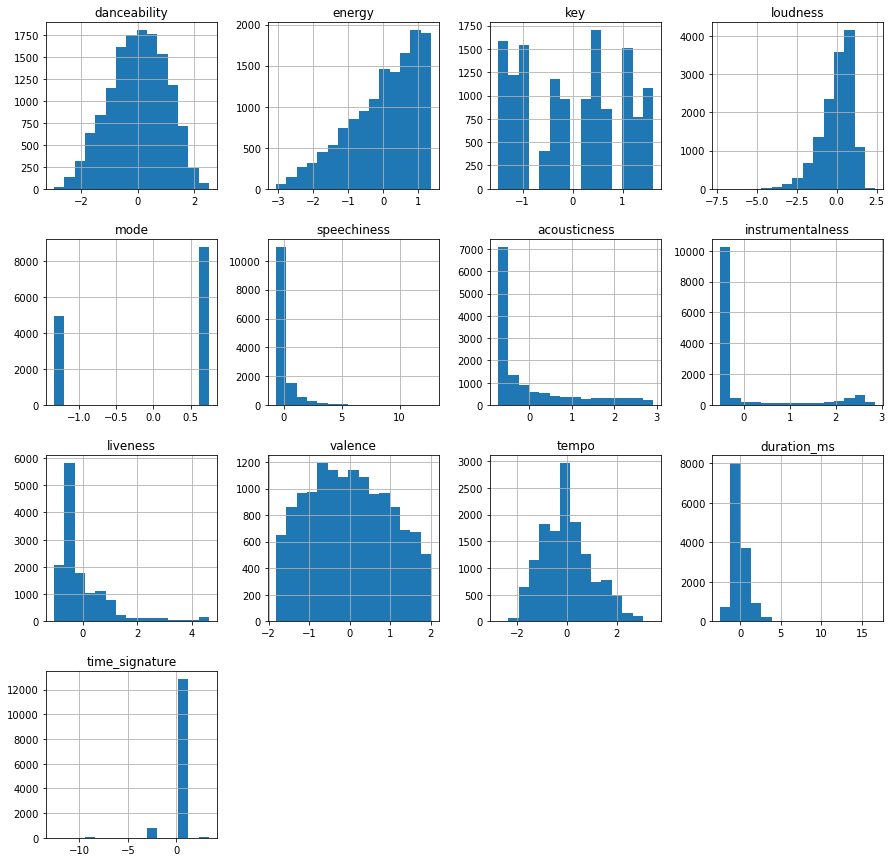

In [243]:
all_df_4_scaled_df.hist(bins=15, figsize=(15,15));

# FINDING THE OPTIMAL K

In [244]:
kmeans.inertia_

215198821294.42477

In [245]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(all_df_4)
print(kmeans.inertia_)

13373120618713.855


In [246]:
K= range(16,50)

In [247]:
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(all_df_4)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[1406255321875.5046, 1244939198448.4502, 1119581344320.2976, 1018413122650.9279, 931139360468.0786, 835827743805.1057, 765357218145.1781, 691928789043.6183, 636293081903.8818, 582718276778.7559, 539474585003.77484, 501988836010.61816, 462060476529.05707, 424230344651.1177, 394681616007.8968, 364615875787.8648, 342713028422.61334, 319710291362.78894, 299016651665.44385, 285536978521.3755, 270966073058.41235, 255317418513.03708, 243985670217.67606, 229351366170.38672, 219746215712.65128, 206963222731.80264, 195071880468.0112, 188735852027.8908, 177684837052.55975, 173136421076.54706, 165372997321.40942, 158790751470.15015, 148793235515.918, 145612588709.51746]


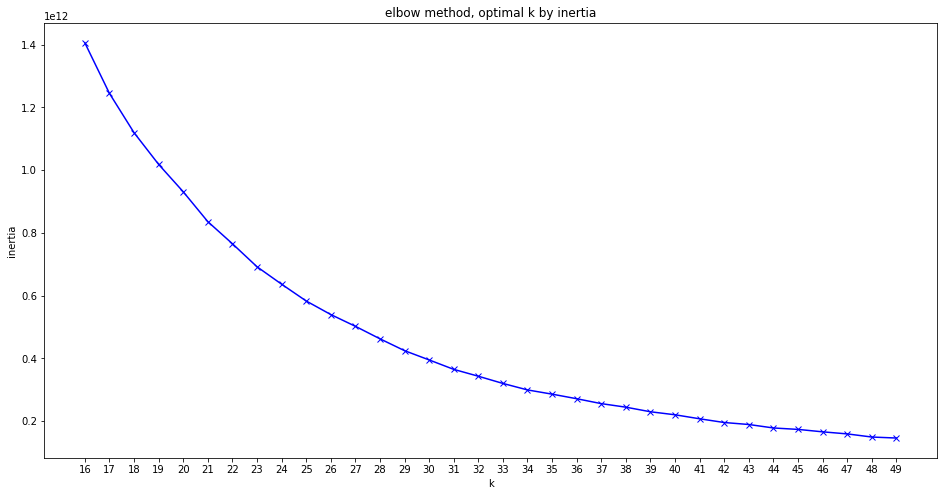

In [248]:
# plot the results

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

# CLUSTERING  2

In [249]:
kmeans=KMeans(n_clusters=28)
#have to set a starting cluster number 

In [250]:
cluster_2=kmeans.fit(all_df_4)

In [251]:
cluster_2.labels_

array([ 1,  1,  1, ..., 14,  8, 22], dtype=int32)

In [252]:
#bring cluster into data frame
all_df_4_copy=all_df_4.copy()
all_df_4_copy['cluster']=cluster_2.labels_

In [253]:
all_df_4_copy.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.589,134.002,211560,4,1
1,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.744,116.883,216319,4,1
2,0.355,0.918,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.240,148.114,222200,4,1
3,0.462,0.836,11,-5.766,0,0.0621,0.00517,0.000000,0.1800,0.671,168.766,155973,4,25
4,0.808,0.381,1,-9.758,1,0.0584,0.34400,0.000003,0.1120,0.687,102.052,174118,4,14


In [254]:
all_df_4_copy

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.5890,134.002,211560,4,1
1,0.640,0.755,1,-4.077,0,0.0287,0.013800,0.020800,0.1200,0.7440,116.883,216319,4,1
2,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.2400,148.114,222200,4,1
3,0.462,0.836,11,-5.766,0,0.0621,0.005170,0.000000,0.1800,0.6710,168.766,155973,4,25
4,0.808,0.381,1,-9.758,1,0.0584,0.344000,0.000003,0.1120,0.6870,102.052,174118,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,0.615,0.476,2,-12.205,0,0.0337,0.161000,0.033400,0.0946,0.6110,91.584,194227,4,7
13746,0.562,0.931,9,-4.809,1,0.0469,0.085900,0.000002,0.2690,0.5370,165.080,212880,4,1
13747,0.620,0.919,0,-4.475,1,0.3570,0.039700,0.000000,0.8510,0.5070,172.021,179773,4,14
13748,0.488,0.615,9,-4.377,1,0.0295,0.034000,0.000000,0.2080,0.6860,130.050,241320,4,8


### Visually explore the clusters

<AxesSubplot:xlabel='energy', ylabel='liveness'>

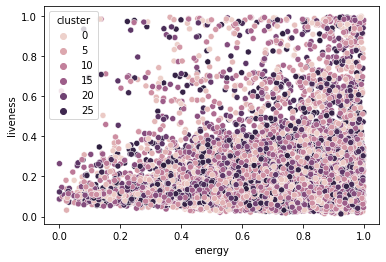

In [255]:
import seaborn as sns

sns.scatterplot(data=all_df_4_copy, x="energy", y="liveness",hue='cluster')

### 3-D plotting with plotly 

In [256]:
markersize= all_df_4_copy['tempo']
markercolour= all_df_4_copy['cluster']

fig1=go.Scatter3d(x=all_df_4_copy['danceability'],
                  y=all_df_4_copy['energy'],
                  z=all_df_4_copy['acousticness'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Blues'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='energy'),
                              zaxis=dict(title='acousticness')))

In [257]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# FINAL DF (cluster and features)

In [258]:
all_df_4_copy

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.5890,134.002,211560,4,1
1,0.640,0.755,1,-4.077,0,0.0287,0.013800,0.020800,0.1200,0.7440,116.883,216319,4,1
2,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.2400,148.114,222200,4,1
3,0.462,0.836,11,-5.766,0,0.0621,0.005170,0.000000,0.1800,0.6710,168.766,155973,4,25
4,0.808,0.381,1,-9.758,1,0.0584,0.344000,0.000003,0.1120,0.6870,102.052,174118,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,0.615,0.476,2,-12.205,0,0.0337,0.161000,0.033400,0.0946,0.6110,91.584,194227,4,7
13746,0.562,0.931,9,-4.809,1,0.0469,0.085900,0.000002,0.2690,0.5370,165.080,212880,4,1
13747,0.620,0.919,0,-4.475,1,0.3570,0.039700,0.000000,0.8510,0.5070,172.021,179773,4,14
13748,0.488,0.615,9,-4.377,1,0.0295,0.034000,0.000000,0.2080,0.6860,130.050,241320,4,8


In [259]:
cluster_column = all_df_4_copy['cluster'].to_list()
song_name = big_df['song_name'].to_list()
song_artist = big_df['song_artist'].to_list()
songid_column = big_df['song_ID'].to_list()
Genre_column = big_df['Genre'].to_list()

final_df=pd.DataFrame({'song_name':song_name, 'song_ID':songid_column, 
                       'song_artist':song_artist, 'Genre':Genre_column, 'cluster':cluster_column})



In [260]:
final_df

,song_name,song_ID,song_artist,Genre,cluster
0,Beggin',3Wrjm47oTz2sjIgck11l5e,Måneskin,Indie,1
1,The Less I Know The Better,4g3Ax56IslQkI6XVfYKVc5,Tame Impala,Indie,1
2,Mr. Brightside,3n3Ppam7vgaVa1iaRUc9Lp,The Killers,Indie,1
3,Boys Don't Cry,1QFh8OH1e78dGd3VyJZCAC,The Cure,Indie,25
4,wake me up,1H6A86dQ7BMdbxofxpQvcK,Ruby,Indie,14
...,...,...,...,...,...
13745,Summer Skin,5vFKQF10Jhyysg3JUbfBUd,Death Cab for Cutie,Other,7
13746,Take on Me,6IVJFZI4fejlJ9XTa3CG5G,A1,Other,1
13747,Shiver,0Yb0L5qlyMDyAZor9d57iS,Maroon 5,Other,14
13748,Matkustaja,5esJb63Nbi1LeG0v4NyKTt,Egotrippi,Other,8


# TESTING THE PRODUCT

## Testing if the song is on top100 hot playlist

In [261]:
song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()

if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! ")
    
else:
    answer = input("Do you mean " + songs_top100.Title[index].values[0] + " by " + songs_top100.Artist[index].values[0] + "?")

    if answer.lower() == 'yes':
        suggestion = songs_top100.sample().index.tolist()
        print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + " by " + songs_top100['Artist'][suggestion].item())

    else:
        print("that song is not in the playlist, try another song!")
        
        

Give us a song name to get a recommendation!: stay
Do you mean Stay by The Kid LAROI & Justin Bieber?yes
Nice! This is a hot song! You might also like Knowing You by Kenny Chesney


## Testing if the song is in Spotify (if it's not on the top100 hot playlist)

In [287]:
song= input("Give us a song name to get a recommendation!: ")

check = songs_top100[songs_top100['Title'].str.lower().str.replace(" "," ").str.contains(song)]
index = check.index.tolist()

# checking if its on top100 

if len(index) == 0:
    print("This song is not on the Top 100 hot playlist! Let me check on Spotify ")
    
# if its on the top100

else:
    suggestion = songs_top100.sample().index.tolist()
    print("Nice! This is a hot song! You might also like " + songs_top100['Title'][suggestion].item() + 
          " by " + songs_top100['Artist'][suggestion].item())    

# if its not on top100 go to Spotify 

check_1 = final_df[final_df['song_name'].str.lower().str.replace(" "," ").str.contains(song)]
index_1 = check_1.index.tolist()

# suggest another song of spotify

if len(index_1) == 0:
    print("Dont know that song, try another one!")
    
else:
    answer = input("The song you want is "+final_df.song_name[index_1].values[0] +"'by'"+ final_df.song_artist[index_1].values[0]+"? (Yes/No)")
    
    if answer.lower() == 'yes':
        song_cluster = final_df.cluster[index_1].values[0]
        suggestion = final_df[final_df['cluster'] == song_cluster].sample().index.tolist()
        print('Nice! You might also like: '+ final_df['song_name']
              [suggestion].item()+ "'by'"+ final_df['song_artist'][suggestion].item()) 
        
        song_id = str((final_df.loc[final_df.song_name == final_df['song_name'][suggestion].item(), 
                                    'song_ID'].values[0]))
        display(IFrame(src=f"https://open.spotify.com/embed/track/{song_id}",
                      width = '320', height = '80',allow = 'encreypted-media'))
    else:
        print('Dont know that song, try another one!')


Give us a song name to get a recommendation!: amarillo
This song is not on the Top 100 hot playlist! Let me check on Spotify 
The song you want is Amarillo'by'J Balvin? (Yes/No)yes
Nice! You might also like: Busted'by'The Black Keys


### Playing a song from Spotify

In [263]:
from IPython.core.display import display
from IPython.display import IFrame

def recommend(song_id):
    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_id}",
               width="320",
               height="80",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
            ))

In [264]:
song_id= '6IVJFZI4fejlJ9XTa3CG5G'
IFrame(src=f"https://open.spotify.com/embed/track/{song_id}",
               width="320",
               height="80",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
        )

### Verify if value is in the df and cluster

In [265]:
final_df.loc[final_df['song_name'] == "The beach"]

,song_name,song_ID,song_artist,Genre,cluster


In [266]:
final_df.loc[final_df['song_name'] == "Don't Say Goodnight"]

,song_name,song_ID,song_artist,Genre,cluster
345,Don't Say Goodnight,5KpBYmEiClvljtwbjEhIJq,Hot Chelle Rae,Pop,1


I put into "Raw NBConvert" some lines to make the notebook easily to read